# Imports

In [1]:
from FLController import *
from ILQGController import *
import plot as plot

# Reaching towards Targets in all direction

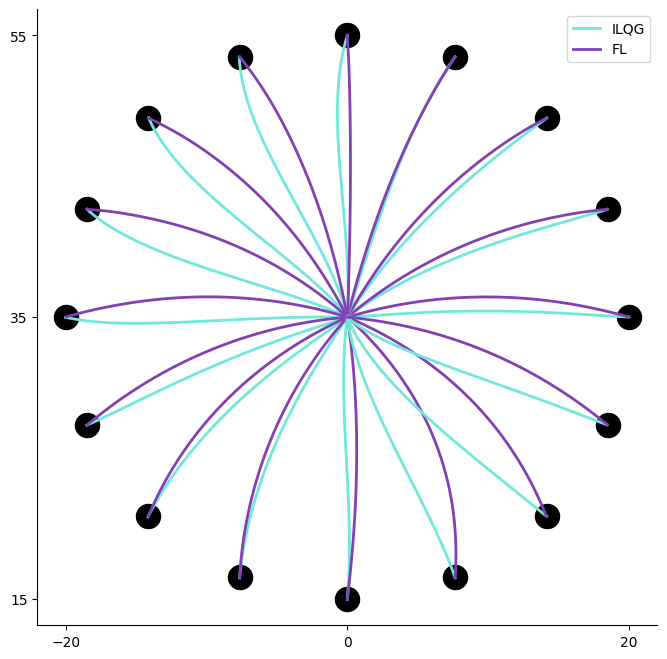

In [9]:
def PlotReachinginAllDirections(Feedback_Linearization,ILQG,K=60,Duration = .6,L=20,start = [0,35],w1 = 1e7,w2 = 1e4,r1 = 1e-4,Noise = True):
    fig, ax = plt.subplots(figsize = (8,8),dpi = 100)
    NUMTARG = 16
    TARG = []

    theta = np.linspace(0,2*pi,NUMTARG,endpoint=False)
    for i in range(NUMTARG):
        TARG.append(start+np.array([L*cos(theta[i]),L*sin(theta[i])]))

    for i in range(NUMTARG):
        plt.scatter(TARG[i][0],TARG[i][1],color = "black",s = 300)
        #plt.text(TARG[i][0]-.5,TARG[i][1]-.8,str(i+1),color = "red",size =  10)
                #plt.plot(np.linspace(start[0],TARG[i][0]),np.linspace(start[1],TARG[i][1]),label = str(i+1))

        targets = TARG[i]
        xILQG,yILQG,_,_ = ILQG(Duration,w1,w2,r1,targets,K,start,Noise = Noise,plot = False)
        X,Y = Feedback_Linearization(Duration,w1,w1,w2,w2,r1,r1,targets,start,Num_iter = K,Activate_Noise=Noise,Delay=0,plot = False)
        plt.plot(xILQG,yILQG,label = "ILQG",color = (0.44,0.91,0.86),linewidth = 2)
        plt.plot(X,Y,label = "FL",color = (0.51,0.25,0.7),linewidth = 2)
        plt.axis("equal")

        MultipleLabel()
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.xticks([-20,0,20])
        plt.yticks([15,35,55])

PlotReachinginAllDirections(Feedback_Linearization,ILQG)